# Testing with Notebooks

It looks like xarray does not recognise hdf5 files when oppening a zip file ?
the IO backend does not recognise the dependencies needed for hdf5 files, maybe its just that.

UPDATE
Now it works, looks like xarray does not recognise the dependencies upon installation and a reeboot is needed.

I wrapped the zip file´s loading into a few functions in processing.py

In [1]:
# Libraries
import matplotlib.pyplot as plt
import xarray as xr

# Custom functions 
import sys
sys.path.append("../src")
sys.path.append("../utils")
from processing import apply_scaling, load_zip, holmes, create_landmask
from visuals import column_plot

# Global variables
save_figures = False
save_files = False

In [2]:
zip_file_path = "../data/raw/ka_small.zip"
# zip_file_path = "C:/Users/andre/Desktop/TFM/Code/files/ka.zip"

xarray_dataset = load_zip(zip_file_path)
scaled_xarray = apply_scaling(xarray_dataset)
scaled_xarray["Holmes_LST"] = holmes(scaled_xarray["Brightness Temperature (V)"])
scaled_xarray

Loading zipfile from ../data/raw/ka_small.zip


100%|██████████| 11/11 [00:04<00:00,  2.26it/s]


Applying scaling


100%|██████████| 3/3 [00:00<00:00, 188.97it/s]


<xarray.Dataset>
Dimensions:                     (lon: 1388, lat: 584, time: 10)
Coordinates:
  * lon                         (lon) float32 -179.9 -179.6 ... 179.6 179.9
  * lat                         (lat) float32 -83.52 -81.98 ... 81.98 83.52
  * time                        (time) datetime64[ns] 2017-01-10 ... 2017-01-15
    Pass                        (time) <U10 'Descending' ... 'Ascending'
Data variables:
    Brightness Temperature (H)  (time, lat, lon) float32 190.6 190.5 ... 206.2
    Brightness Temperature (V)  (time, lat, lon) float32 222.1 222.2 ... 219.6
    Time Information            (time, lat, lon) float32 -624.0 ... -1.038e+03
    Holmes_LST                  (time, lat, lon) float32 231.4 231.4 ... 228.5
Attributes: (12/28)
    CDI:                       Climate Data Interface version 1.9.9 (https://...
    Conventions:               CF-1.6
    ProductName:               AMSR2-L3
    GeophysicalName:           Brightness Temperature (36GHz)
    MeanType:                  DayMean
    Projection:                EQR
    ...                        ...
    OrbitDirection:            Descending
    PlatformShortName:         GCOM-W1
    SensorShortName:           AMSR2
    ECSDataModel:              B.0
    history:                   Tue Apr 27 13:14:18 2021: cdo remapbil,/media/...
    CDO:                       Climate Data Operators version 1.9.9 (https://...

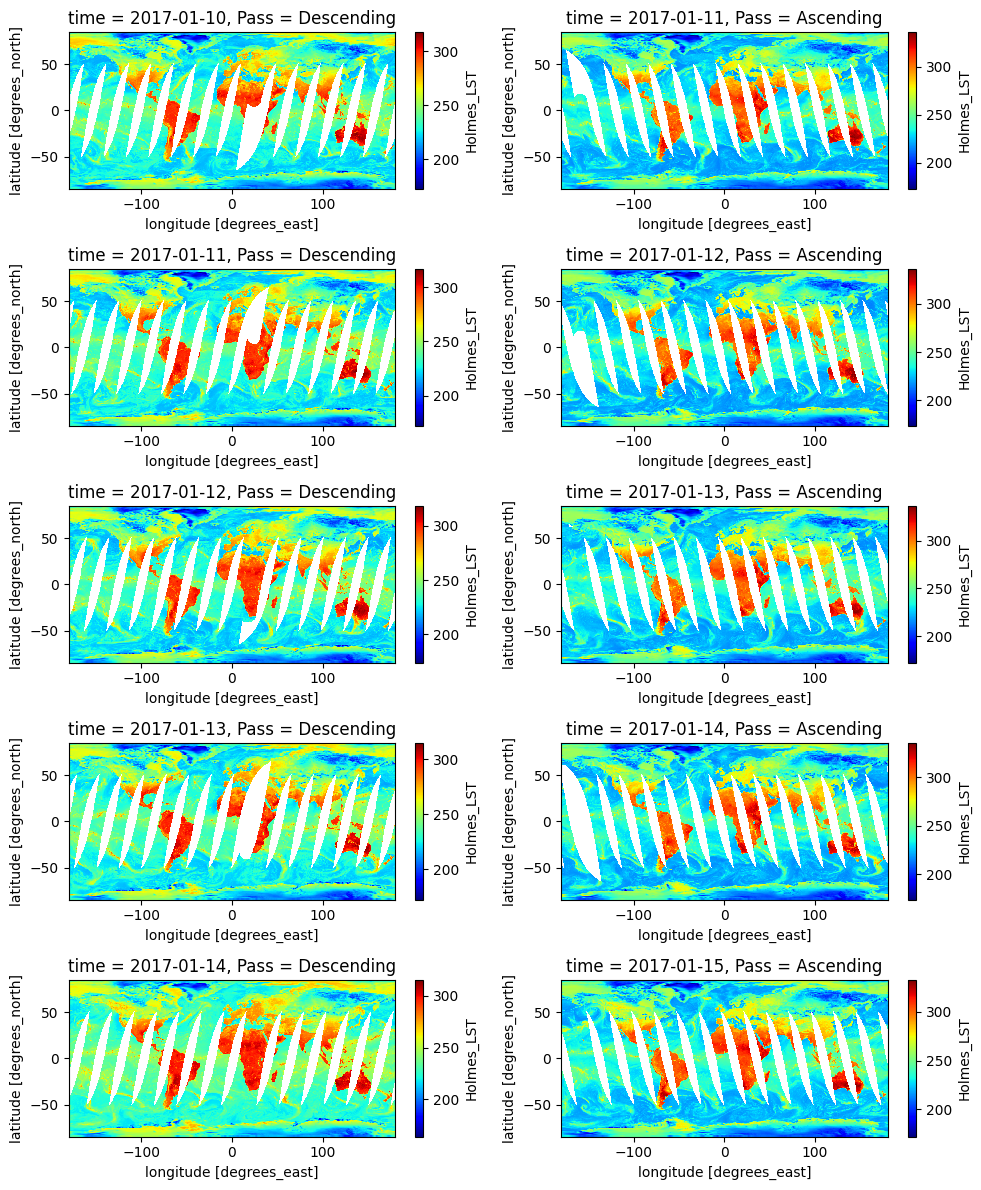

In [3]:
# Now we can easily plot data with the Dataset object with a custom function
column_plot(scaled_xarray, save_path = "../data/figures/Xarray_Plot_1.png" )


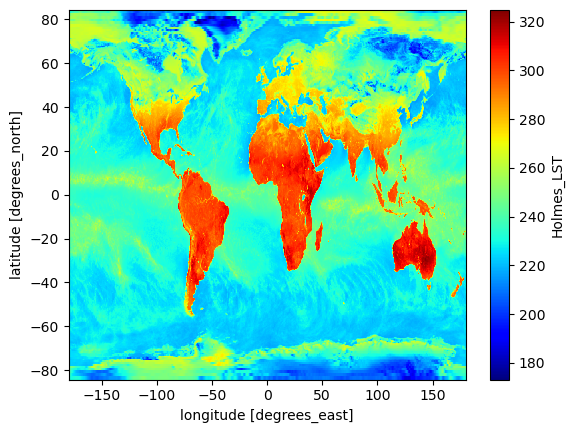

In [4]:
# Calculate the average for each pixel on the map.
mean2017 = scaled_xarray["Holmes_LST"].mean(dim="time")
mean2017.plot(cmap="jet")
if save_figures:
    plt.savefig("../data/figures/2017_mean_Holmes_LST.png")

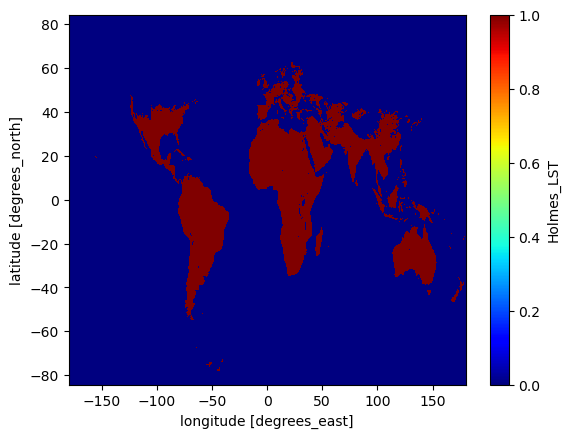

In [6]:
# Create a mask for the Ocean (0) vs Land (1) data
landmask = create_landmask (mean2017, show= True)

if save_figures:
    create_landmask (mean2017, figure_path = "../data/figures/Holmes_landmask.png")
if save_files:
    create_landmask (mean2017, file_path = "../data/processed/Holmes_landmask.h5" ) 


The mask depends on the data we take, across all year, the average temperature of surfaces should be greater than the ocean´s.

We load the full ka dataset, then make the mask and save it into a .hdf file for future use.


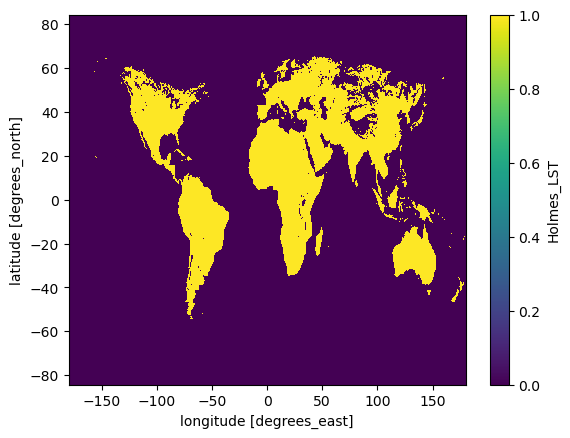

In [7]:
# Load the created landmask to test
landmask = xr.open_dataset("../data/processed/Holmes_landmask.h5")
landmask.Holmes_LST.plot()